<a href="https://colab.research.google.com/github/anuragiiser/SS4201-project/blob/main/SS4202_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_stars=pd.read_csv('/content/drive/MyDrive/SS4202/dataset.csv')

In [ ]:
df_stars['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

In [ ]:
df_stars['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

<ipython-input-22-39084636993e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_stars['Temperature (K)'])


<Axes: xlabel='Temperature (K)', ylabel='Density'>

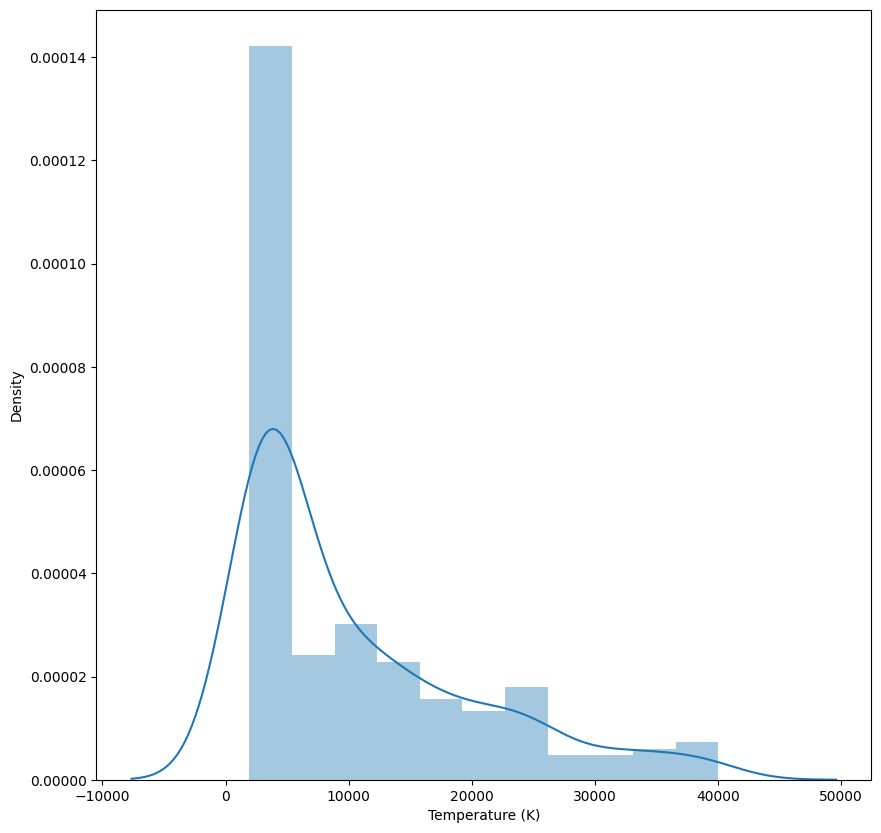

In [ ]:
figure= plt.figure(figsize=(10,10))
sns.distplot(df_stars['Temperature (K)'])

Temprature and star color : highest temp of orange blue

<Axes: xlabel='Star color', ylabel='Temperature (K)'>

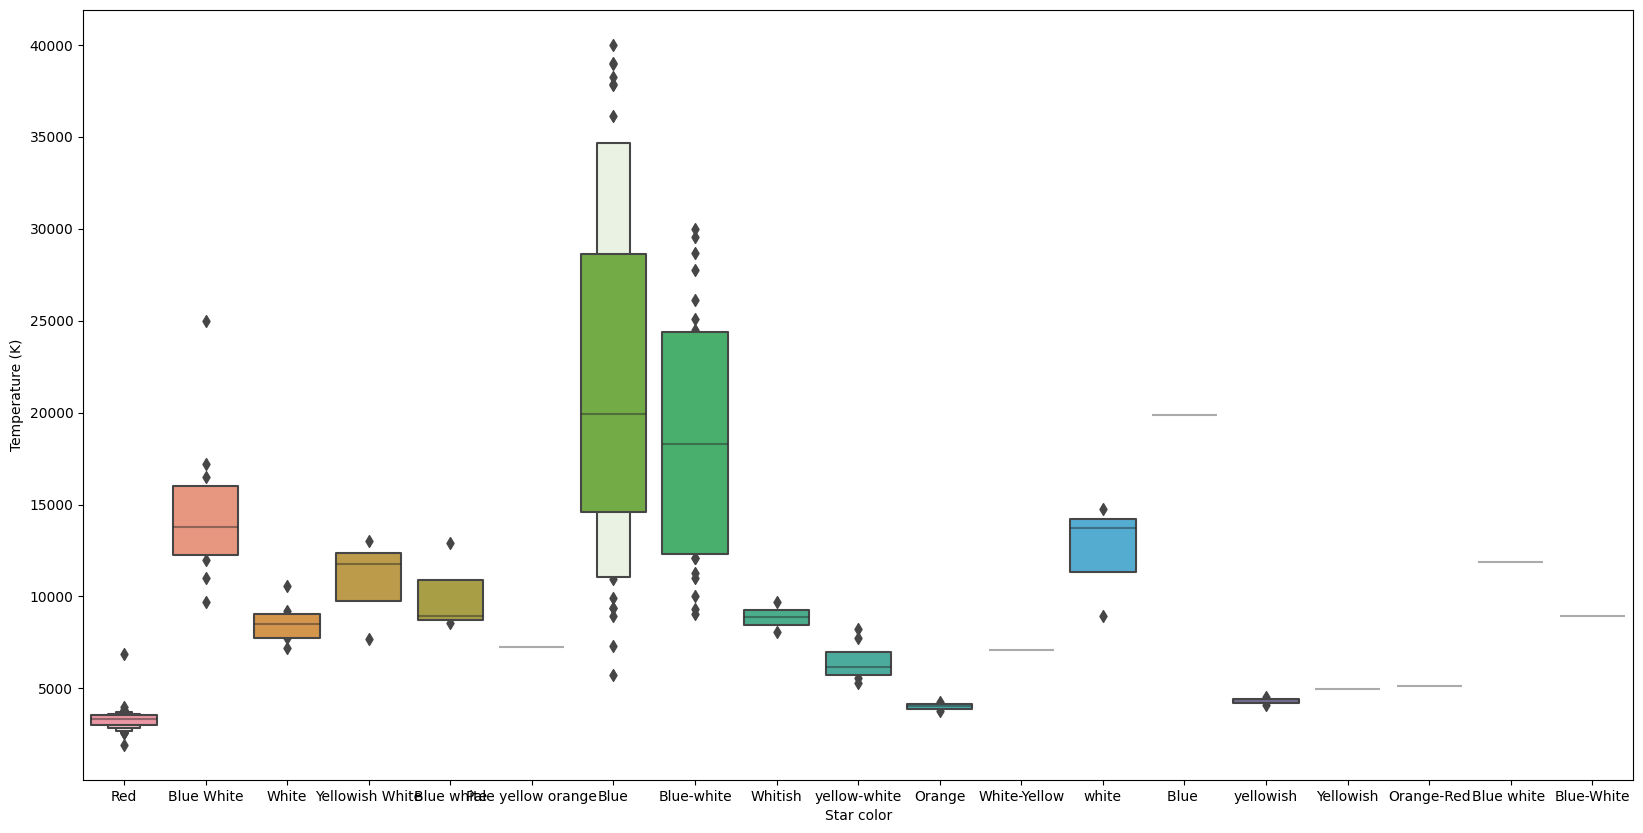

In [ ]:
figure= plt.figure(figsize=(20,10))
sns.boxenplot(x='Star color',y='Temperature (K)',data=df_stars)

Spectral class with Luminosity : the highest luminosity is O class

In [ ]:
Spectral = pd.get_dummies(df_stars['Spectral Class'],drop_first=True)

In [ ]:
df_stars.drop('Spectral Class',axis=1,inplace=True)
df_stars = pd.concat([df_stars,Spectral],axis=1)
df_stars=df_stars.drop('Star color',axis=1)

In [ ]:
df_stars.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,B,F,G,K,M,O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,1,0


4- Classification model "Decision Tree"

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_stars.drop('Star type',axis=1),df_stars['Star type'],test_size=0.20,random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions= dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('__________________________________________________________________________')
print(classification_report(y_test,predictions))

[[ 9  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  0  8]]
__________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         8

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

